In [1]:
import os, shutil

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from tensorflow.keras import layers
from tensorflow.keras import models
import matplotlib.pyplot as plt

In [8]:
original_db_dir = './train'
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import models


In [11]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [16]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150,150),
batch_size=20,
class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
for data_batch, labels_batch in train_generator:
    print ('배치 데이터 크기:', data_batch.shape)
    print ('배치 레이블 크기:', labels_batch.shape)
    break


배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [17]:
history = model.fit_generator( # 배치 제너레이터를 사용하여 모델 훈련
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)
model.save('cats_and_dogs_small_1.h5') # 모델 저장

Epoch 1/30
100/100 [==============================] - 36s 360ms/step - loss: 0.6925 - acc: 0.5300 - val_loss: 0.6802 - val_acc: 0.6460
Epoch 2/30
100/100 [==============================] - 32s 319ms/step - loss: 0.6608 - acc: 0.6015 - val_loss: 0.5873 - val_acc: 0.7540
Epoch 3/30
100/100 [==============================] - 30s 304ms/step - loss: 0.6102 - acc: 0.6690 - val_loss: 0.8140 - val_acc: 0.3990
Epoch 4/30
100/100 [==============================] - 30s 300ms/step - loss: 0.5659 - acc: 0.7055 - val_loss: 0.6823 - val_acc: 0.5910
Epoch 5/30
100/100 [==============================] - 30s 297ms/step - loss: 0.5328 - acc: 0.7375 - val_loss: 0.5611 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 30s 296ms/step - loss: 0.5146 - acc: 0.7485 - val_loss: 0.7651 - val_acc: 0.5270
Epoch 7/30
100/100 [==============================] - 30s 298ms/step - loss: 0.4973 - acc: 0.7530 - val_loss: 0.6104 - val_acc: 0.6620
Epoch 8/30
100/100 [==============================] - 2

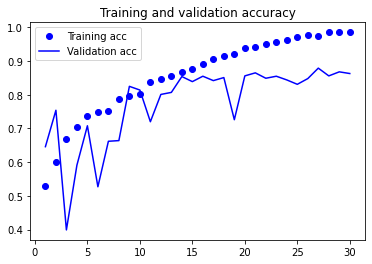

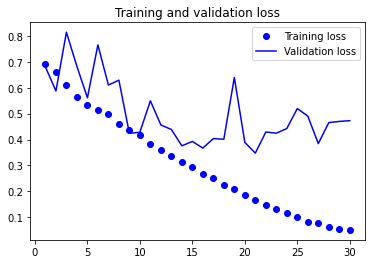

In [18]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [25]:
from tensorflow.keras.preprocessing import image
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3] # 증식할 이미지 선택
img = image.load_img(img_path, target_size=(150,150)) # 이미지를 읽고 크기 변경
x = image.img_to_array(img) # (150,150,3) 크기의 numpy 배열로 변환
x = x.reshape((1,)+x.shape) # (1,150,150,3) 크기로 변환
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
plt.show()

NameError: name 'train_cats_dir' is not defined

In [26]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [30]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    )
test_datagen = ImageDataGenerator(rescale=1./255) # 검증 데이터는 증식되민 안됨

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [32]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [35]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size,
    epochs=300,
    validation_data=validation_generator,
    validation_steps= validation_generator.n//validation_generator.batch_size
)
model.save('cats_and_dogs_small_2.h5')

Epoch 1/300
62/62 [==============================] - 33s 531ms/step - loss: 0.6890 - acc: 0.5381 - val_loss: 0.7140 - val_acc: 0.3770
Epoch 2/300
62/62 [==============================] - 33s 528ms/step - loss: 0.6766 - acc: 0.5727 - val_loss: 0.7334 - val_acc: 0.4209
Epoch 3/300
62/62 [==============================] - 33s 528ms/step - loss: 0.6648 - acc: 0.5915 - val_loss: 0.8210 - val_acc: 0.3740
Epoch 4/300
62/62 [==============================] - 33s 532ms/step - loss: 0.6492 - acc: 0.6118 - val_loss: 0.9385 - val_acc: 0.3029
Epoch 5/300
62/62 [==============================] - 33s 530ms/step - loss: 0.6336 - acc: 0.6428 - val_loss: 0.6651 - val_acc: 0.5801
Epoch 6/300
62/62 [==============================] - 33s 535ms/step - loss: 0.6253 - acc: 0.6453 - val_loss: 0.5454 - val_acc: 0.7646
Epoch 7/300
62/62 [==============================] - 33s 525ms/step - loss: 0.6190 - acc: 0.6540 - val_loss: 0.5125 - val_acc: 0.7858
Epoch 8/300
62/62 [==============================] - 33s 531ms

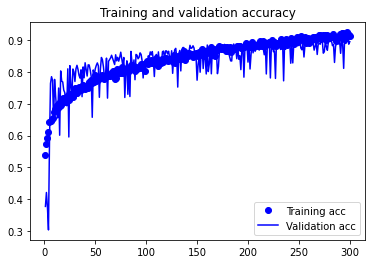

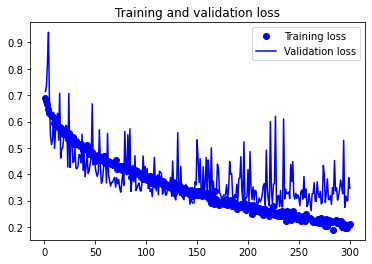

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()